## Analizying Data

In [1]:
import pandas as pd

### Dataset

In [ ]:

%load_ext watermark
%watermark

In [23]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,comb08,co2TailpipeGpm
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


## Quality Assurance (QA) Data

### Duplicated Items

In [24]:
vehicles.shape

(38436, 11)

In [25]:
## Create a new Column in order to see the repeta make and model
vehicles["only_model"] = vehicles.make.str.cat([vehicles.model,vehicles.year.apply(str)],sep=".")

In [26]:
vehicles.only_model.value_counts()

Jeep.Cherokee/Wagoneer.1985                  24
GMC.C15 Pickup 2WD.1984                      19
Chevrolet.C10 Pickup 2WD.1984                19
Ford.F150 Pickup 2WD.1984                    19
Chevrolet.C10 Pickup 2WD.1985                18
Chevrolet.S10 Pickup 2WD.1984                18
GMC.C15 Pickup 2WD.1985                      18
GMC.S15 Pickup 2WD.1984                      18
Ford.Ranger Pickup 2WD.1984                  17
Chevrolet.C10 Pickup 2WD.1986                17
Mitsubishi.Truck 2WD.1984                    17
GMC.C15 Pickup 2WD.1986                      17
Dodge.Ram 50 Pickup 2WD.1984                 17
Ford.Escort.1984                             16
Mercury.Lynx.1984                            16
Volkswagen.Rabbit.1984                       16
Chevrolet.G10/20 Van 2WD.1984                16
Ford.Escort.1985                             16
GMC.Vandura G15/25 2WD.1984                  16
Ford.F150 Pickup 2WD.1985                    16
Ford.F250 Pickup 2WD.1985               

In [27]:
## Search duplicated and drop then
vehicles[vehicles.duplicated()].shape

(1506, 12)

In [28]:
vehicles = vehicles.drop_duplicates()

In [29]:
vehicles.shape

(36930, 12)

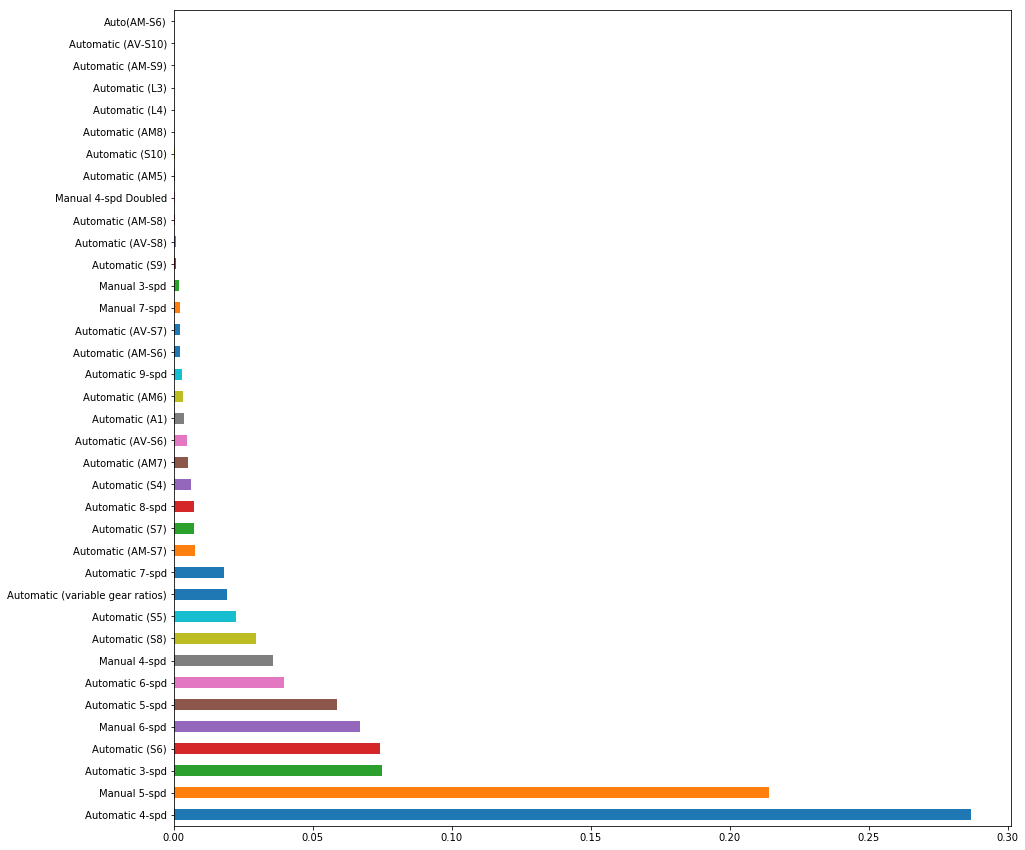

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
vehicles.trany.value_counts(normalize=True).plot.barh()

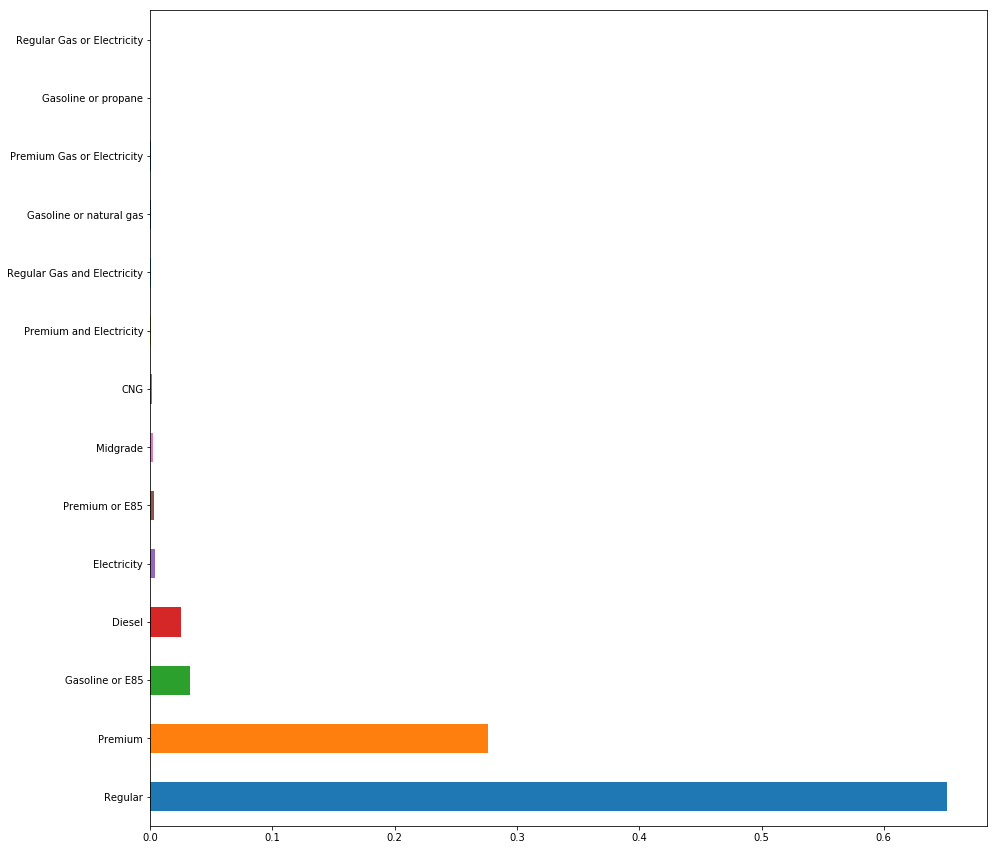

In [36]:
vehicles.fuelType.value_counts(normalize=True).plot.barh()

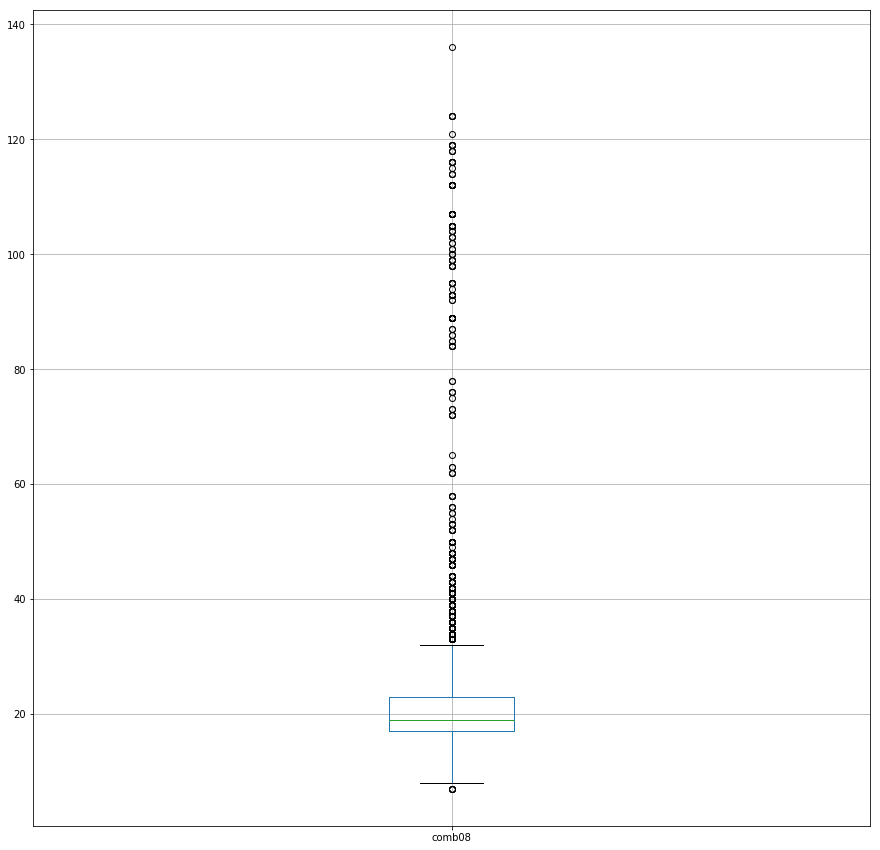

In [38]:
vehicles.boxplot(column="comb08")

In [39]:
#After cleaning csv , we can export it
vehicles.to_csv("vehicles_QA.csv",index=False)